**PROJET 9 PREDICTION DE LA DEMANDE EN ELECTRICITE**



In [1]:
! pip install pmdarima

     |████████████████████████████████| 1.4 MB 3.8 MB/s 
     |████████████████████████████████| 9.8 MB 44.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
#Import des principales librairies Python
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import pmdarima as pm

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.gofplots import ProbPlot
from scipy.stats import shapiro
from IPython.display import clear_output
from time import time

import itertools
import warnings                                  
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Principales versions utilisées
print("Jupyter Notebook : " + str(pd.__version__))
print("Pandas : " + str(pd.__version__))
print("Numpy : " + str(np.__version__))
print("Matplotlib : " + str(matplotlib.__version__))
print("Seaborn : " + str(sns.__version__))
print("Statsmodels : " + str(sm.__version__))

Jupyter Notebook : 1.3.5
Pandas : 1.3.5
Numpy : 1.21.5
Matplotlib : 3.2.2
Seaborn : 0.11.2
Statsmodels : 0.13.2


In [4]:
#Paramètres de style
pylab.style.use('fivethirtyeight') 
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
          'lines.linewidth': 1.5,
          'axes.labelsize': 'x-large',
          'axes.titlesize':35,
          'axes.titleweight':'bold',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [5]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [6]:
import os

In [7]:
os.listdir()

['.config', 'sample_data']

In [8]:
os.listdir('/gdrive/MyDrive')

['elasticity.txt',
 'CV_van15.gdoc',
 'Lettre de recommandation Lincence pro carto.gdoc',
 'Document sans titre (6).gdoc',
 'Notes de cours.gdoc',
 'CEGO20200123091813_MAIL_ComRodH01337763730 (1).rtf.gdoc',
 'CEGO20200123091813_MAIL_ComRodH01337763730.rtf.gdoc',
 'fiches produit.gdoc',
 'gross_sales_2020-03-31_2020-06-28.csv',
 'sales_2020-03-31_2020-06-28.csv',
 '.td-3',
 'crash_log_2.txt',
 '.tdck',
 'crash_log_3.txt',
 'crash_log_1.txt',
 'Copie de Shareholder Template (1).gdoc',
 'Shareholder Template.gdoc',
 'Copie de Shareholder Template.gdoc',
 'Formulaire - LC - V25062020.gdoc',
 'Business Plan Template.gslides',
 'Conditions Particulières - LC Hizi workout - Marchand - Master - V070720....gdoc',
 'Copie de Business Plan Template.gslides',
 'consommation.csv',
 'consommation.xls',
 'dju.xlsx',
 'dju.csv',
 'world_population.csv',
 'bis.xlsx',
 "Plan+d'apprentissage+personnalisé (2) (1).gsheet",
 "Plan d'apprentissage formation Data Analyst.gsheet",
 "Plan+d'apprentissage+pers

## 1) Description de la consommation en énergie

Traitement du jeu de données exporté du site de RTE

In [9]:
#Chargement du dataset sur la consommation energetique 'Consommation.csv'
data_conso = pd.read_csv('/gdrive/MyDrive/Consommation.csv', encoding='latin-1',parse_dates=[0])
data_conso.head(10)

Mois                Qualitï¿½ Territoire  Production totale  \
0 2012-01-01  Donnï¿½es dï¿½finitives     France              57177   
1 2012-02-01  Donnï¿½es dï¿½finitives     France              54419   
2 2012-03-01  Donnï¿½es dï¿½finitives     France              48583   
3 2012-04-01  Donnï¿½es dï¿½finitives     France              44192   
4 2012-05-01  Donnï¿½es dï¿½finitives     France              40433   
5 2012-06-01  Donnï¿½es dï¿½finitives     France              37518   
6 2012-07-01  Donnï¿½es dï¿½finitives     France              37910   
7 2012-08-01  Donnï¿½es dï¿½finitives     France              36339   
8 2012-09-01  Donnï¿½es dï¿½finitives     France              38035   
9 2012-10-01  Donnï¿½es dï¿½finitives     France              42987   

   Production nuclï¿½aire  Production thermique totale  \
0                 42811.0                         5399   
1                 38661.0                         8721   
2                 37549.0                         5276   
3                 33100.0                         3484   
4                 29058.0                         1772   
5                 26562.0                         2219   
6                 28818.0                         2221   
7                 28314.0                         2533   
8                 30130.0                         2450   
9                 32848.0                         3518   

   Production thermique charbon  Production thermique fioul  \
0                         741.0                         691   
1                        2511.0                        1309   
2                        1435.0                         666   
3                        1655.0                         486   
4                         854.0                         368   
5                         960.0                         384   
6                        1110.0                         437   
7                        1165.0                         413   
8                        1382.0                         396   
9                        2039.0                         456   

   Production thermique gaz  Production hydraulique  ...  \
0                      3967                    6741  ...   
1                      4901                    5244  ...   
2                      3175                    3894  ...   
3                      1343                    5302  ...   
4                       549                    7706  ...   
5                       875                    6823  ...   
6                       674                    4901  ...   
7                       956                    3563  ...   
8                       671                    3641  ...   
9                      1022                    4534  ...   

   Production bioï¿½nergies  Consommation totale  Solde exportateur  \
0                       514                51086             5371.0   
1                       454                54476             -715.0   
2                       531                43156             4888.0   
3                       405                40176             3447.0   
4                       469                35257             4425.0   
5                       437                33219             3648.0   
6                       513                34141             3216.0   
7                       486                32247             3561.0   
8                       470                33269             4054.0   
9                       450                38628             3625.0   

   Echanges export  Echanges import  Echanges avec le Royaume-Uni  \
0           7043.0           1672.0                         929.0   
1           4504.0           5220.0                        -798.0   
2           7042.0           2153.0                         583.0   
3           5762.0           2314.0                         547.0   
4           6391.0           1965.0                         693.0   
5           5674.0           2026.0 

## 1.1) Représentation de la consommation électrique

On dispose de plusieurs informations sur la consommation en énergie du territoire français. On a des informations concernant la production totale ainsi que le découpage de ces productions (nucléaire, charbon, fioul, gaz, hydraulique, bioénergies), la consommation totale, le solde exportateur ainsi que les échanges avec des pays voisins avec le Royaume-Uni, l'Espagne, l'Italie, la Suisse, l'Allemagne et la Belgique.

 Représentation et statistiques descriptives de la consommation électrique

Pour la suite de cette analyse, on va s'intéresse à la consommation électrique totale du territoire national uniquement. On va créer une variable contenant le la consommation mensuelle électrique pour pouvoir compléter notre analyse de la série temporelle de la consommation

In [10]:
#Création d'un jeu de données mensuelles de consommation totale d'électricité en énergie 
#Restriction sur la modalité 'France' et projection sur les Series pertinentes
conso = data_conso.copy()
conso = conso[['Mois', 'Territoire', 'Consommation totale']]
conso = conso[conso['Territoire'] == 'France']
conso.drop('Territoire', axis=1, inplace=True)
conso.rename(columns={'Mois': 'mois', 'Consommation totale': 'consommation'}, inplace=True)

In [70]:
#Création d'un jeu de données mensuelles de consommation totale d'électricité en énergie 
#Restriction sur la modalité 'France' et projection sur les Series pertinentes
conso = data_conso.copy()
conso = conso[['Mois', 'Territoire', 'Consommation totale']]
conso = conso[conso['Territoire'] == 'France']
conso.drop('Territoire', axis=1, inplace=True)
conso.rename(columns={'Mois': 'date', 'Consommation totale': 'consommation'}, inplace=True)

In [71]:
#Aperçu des données mensuelles de consommation totale d'électricité en énergie (dataframe "conso")
display(conso.head())
display(conso.shape)

date  consommation
0 2012-01-01         51086
1 2012-02-01         54476
2 2012-03-01         43156
3 2012-04-01         40176
4 2012-05-01         35257

(119, 2)

In [72]:
#Visualisation des données selon l'indice temporel mois/année
conso

date  consommation
0    2012-01-01         51086
1    2012-02-01         54476
2    2012-03-01         43156
3    2012-04-01         40176
4    2012-05-01         35257
...         ...           ...
1344 2021-07-01         32959
1357 2021-08-01         31184
1370 2021-09-01         32350
1383 2021-10-01         36762
1396 2021-11-01         44458

[119 rows x 2 columns]

In [74]:
#Changement du type de Series en datetime
#Changement d'index pour que la série temporelle soit reconnue
conso['date'] = pd.to_datetime(conso['date'])
conso.set_index('date', inplace=True)

In [75]:
#Visualisation des données selon l'indice temporel mois/année
conso

consommation
date                    
2012-01-01         51086
2012-02-01         54476
2012-03-01         43156
2012-04-01         40176
2012-05-01         35257
...                  ...
2021-07-01         32959
2021-08-01         31184
2021-09-01         32350
2021-10-01         36762
2021-11-01         44458

[119 rows x 1 columns]

In [88]:
conso2=conso.query("index < 20210101")
conso2

consommation
date                    
2012-01-01         51086
2012-02-01         54476
2012-03-01         43156
2012-04-01         40176
2012-05-01         35257
...                  ...
2020-08-01         31428
2020-09-01         32307
2020-10-01         38332
2020-11-01         39840
2020-12-01         47565

[108 rows x 1 columns]

In [89]:
#Aperçu des données mensuelles de consommation totale d'électricité en énergie (dataframe "conso")
display(conso2.head())
display(conso2.shape)

consommation
date                    
2012-01-01         51086
2012-02-01         54476
2012-03-01         43156
2012-04-01         40176
2012-05-01         35257

(108, 1)

In [91]:
#Recherche de valeurs aberrantes
conso2.sort_values(by='date', ascending=True).head()

consommation
date                    
2012-01-01         51086
2012-02-01         54476
2012-03-01         43156
2012-04-01         40176
2012-05-01         35257

In [94]:
#Visualisation des données selon l'indice temporel mois/année
conso2

consommation
date                    
2012-01-01         51086
2012-02-01         54476
2012-03-01         43156
2012-04-01         40176
2012-05-01         35257
...                  ...
2020-08-01         31428
2020-09-01         32307
2020-10-01         38332
2020-11-01         39840
2020-12-01         47565

[108 rows x 1 columns]

Une fois les données de consommation totale pour le territoire français extraits et rassemblés dans un unique tableau, on peut représenter graphiquement cette série temporelle.

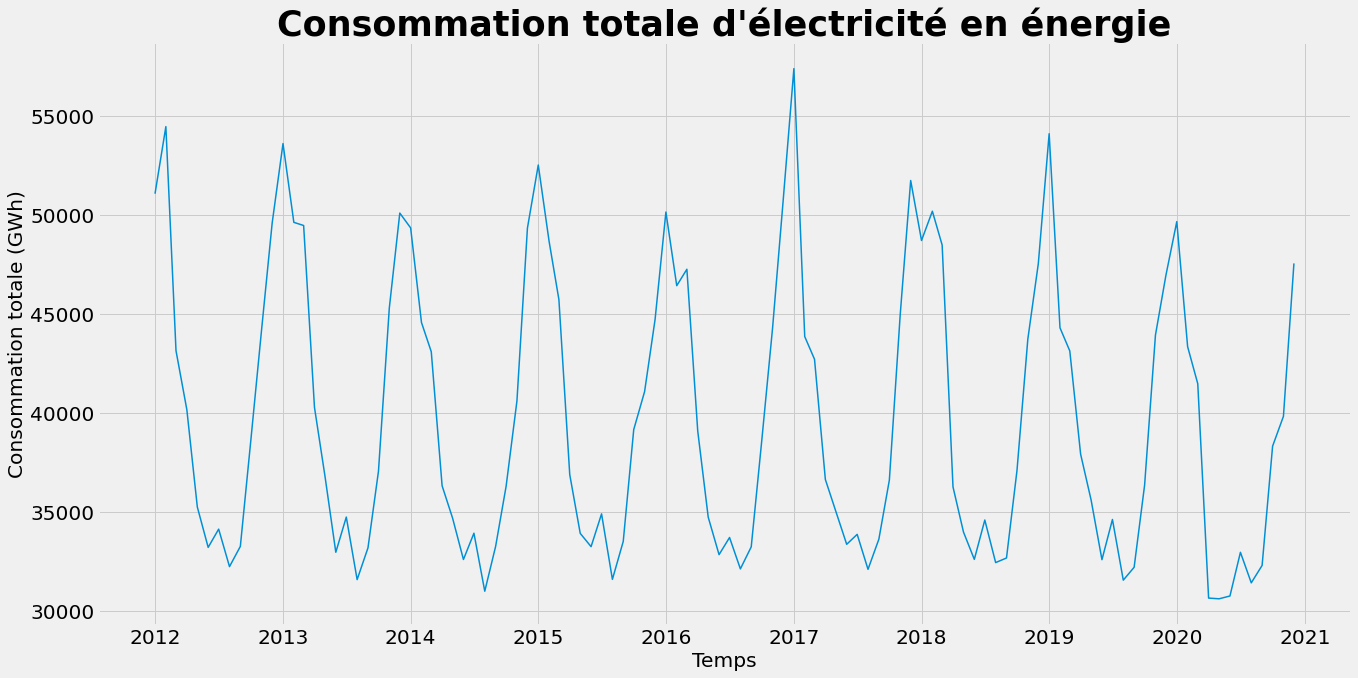

In [101]:
#Visualisation de la consommation totale d'électricité en énergie 
plt.plot(conso2.consommation)
plt.xlabel('Temps')
plt.ylabel('Consommation totale (GWh)')
plt.title("Consommation totale d'électricité en énergie")
plt.savefig("conso_elect.png")
plt.show()

Dans la série temporelle ci-dessus on peut identifier des cycles assez réguliers au cours du temps et de même amplitude avec toutefois un pic en de consommation en 2017. Une correction des données de consommation mensuelles de l'effet température (dues au chauffage électrique) sera faite à l’aide de la régression linéaire.

Il est donc nécessaire d'extraire les données propres au chauffage électrique sur la même période

In [102]:
#Récapitulatif des consommations annuelles
conso2.resample('Y').sum()

consommation
date                    
2012-12-31        489517
2013-12-31        494842
2014-12-31        465150
2015-12-31        476050
2016-12-31        483219
2017-12-31        482008
2018-12-31        478431
2019-12-31        473401
2020-12-31        449005

L'agrégation des consommations mensuelles par année apporte également une vision rapide des dépenses énergétiques entre 2012 et 2020. 2020 étant une "année de faible consommation", et 2013 l'année la plus énergivore. Voyons l'impact du chauffage électrique.

2) **Description des données de température**

On s'intéresse ensuite aux données concernant les variations de température que l'on nomme DJU. Les données téléchargées contiennent les informations de plusieurs villes, on calcule donc la moyenne nationale qui sera utilisée par la suite.

In [18]:
# Chargement du dataset contenant les températures exprimés en Degré Jour Unifié (DJU)

df_dju = pd.read_csv('/gdrive/MyDrive/DJU.csv',  sep=',', encoding='latin-1',parse_dates=[0])
df_dju['DJU_mean'] = (df_dju['DJU_H1a']+df_dju['DJU_H1b']+df_dju['DJU_H1c']+df_dju['DJU_H2a']+df_dju['DJU_H2b']+df_dju['DJU_H2c']+df_dju['DJU_H2d']+df_dju['DJU_H3'])/8
df_dju.head()

Mois Territoire_H1a  DJU_H1a          Territoire_H1b  DJU_H1b  \
0 2012-01-01     St-Quentin    398.1  Charleville-MÃ©ziÃ¨res    430.9   
1 2012-02-01     St-Quentin    497.8  Charleville-MÃ©ziÃ¨res    531.8   
2 2012-03-01     St-Quentin    274.3  Charleville-MÃ©ziÃ¨res    313.3   
3 2012-04-01     St-Quentin    291.4  Charleville-MÃ©ziÃ¨res    294.1   
4 2012-05-01     St-Quentin    137.7  Charleville-MÃ©ziÃ¨res    128.4   

  Territoire_H1c  DJU_H1c Territoire_H2d  DJU_H2d Territoire_H3  DJU_H3  \
0      AmbÃ©rieu    444.6       St Aubin    366.3          Nice   248.3   
1      AmbÃ©rieu    574.1       St Aubin    436.4          Nice   304.4   
2      AmbÃ©rieu    253.4       St Aubin    209.7          Nice   152.8   
3      AmbÃ©rieu    211.2       St Aubin    204.2          Nice   107.8   
4      AmbÃ©rieu     90.3       St Aubin     77.3          Nice    48.3   

  Territoire_H2c  DJU_H2c Territoire_H2b  DJU_H2b Territoire_H2a  DJU_H2a  \
0       Bordeaux    333.6         Cognac    343.8          Brest    303.5   
1       Bordeaux    439.2         Cognac    468.9          Brest    350.5   
2       Bordeaux    201.0         Cognac    206.4          Brest    241.0   
3       Bordeaux    210.4         Cognac    217.9          Brest    276.1   
4       Bordeaux     58.4         Cognac     71.5          Brest    151.8   

   DJU_mean  
0  358.6375  
1  450.3875  
2  231.4875  
3  226.6375  
4   95.4625

In [111]:
df_dju.rename(columns={'Mois': 'date'}, inplace=True)

In [112]:
df_dju.head()

date Territoire_H1a  DJU_H1a          Territoire_H1b  DJU_H1b  \
0 2012-01-01     St-Quentin    398.1  Charleville-MÃ©ziÃ¨res    430.9   
1 2012-02-01     St-Quentin    497.8  Charleville-MÃ©ziÃ¨res    531.8   
2 2012-03-01     St-Quentin    274.3  Charleville-MÃ©ziÃ¨res    313.3   
3 2012-04-01     St-Quentin    291.4  Charleville-MÃ©ziÃ¨res    294.1   
4 2012-05-01     St-Quentin    137.7  Charleville-MÃ©ziÃ¨res    128.4   

  Territoire_H1c  DJU_H1c Territoire_H2d  DJU_H2d Territoire_H3  DJU_H3  \
0      AmbÃ©rieu    444.6       St Aubin    366.3          Nice   248.3   
1      AmbÃ©rieu    574.1       St Aubin    436.4          Nice   304.4   
2      AmbÃ©rieu    253.4       St Aubin    209.7          Nice   152.8   
3      AmbÃ©rieu    211.2       St Aubin    204.2          Nice   107.8   
4      AmbÃ©rieu     90.3       St Aubin     77.3          Nice    48.3   

  Territoire_H2c  DJU_H2c Territoire_H2b  DJU_H2b Territoire_H2a  DJU_H2a  \
0       Bordeaux    333.6         Cognac    343.8          Brest    303.5   
1       Bordeaux    439.2         Cognac    468.9          Brest    350.5   
2       Bordeaux    201.0         Cognac    206.4          Brest    241.0   
3       Bordeaux    210.4         Cognac    217.9          Brest    276.1   
4       Bordeaux     58.4         Cognac     71.5          Brest    151.8   

   DJU_mean  
0  358.6375  
1  450.3875  
2  231.4875  
3  226.6375  
4   95.4625

In [118]:
df= df_dju[['date', 'DJU_mean']]
df

date  DJU_mean
0   2012-01-01  358.6375
1   2012-02-01  450.3875
2   2012-03-01  231.4875
3   2012-04-01  226.6375
4   2012-05-01   95.4625
..         ...       ...
115 2021-08-01    0.0000
116 2021-09-01    0.0000
117 2021-10-01    0.0000
118 2021-11-01    0.0000
119 2021-12-01    0.0000

[120 rows x 2 columns]

In [120]:
#Changement du type de Series en datetime
#Changement d'index pour que la série temporelle soit reconnue
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [121]:
#Visualisation des données selon l'indice temporel mois/année
df

DJU_mean
date                
2012-01-01  358.6375
2012-02-01  450.3875
2012-03-01  231.4875
2012-04-01  226.6375
2012-05-01   95.4625
...              ...
2021-08-01    0.0000
2021-09-01    0.0000
2021-10-01    0.0000
2021-11-01    0.0000
2021-12-01    0.0000

[120 rows x 1 columns]

In [122]:
DJU=df.query("index < 20210101")
DJU

DJU_mean
date                
2012-01-01  358.6375
2012-02-01  450.3875
2012-03-01  231.4875
2012-04-01  226.6375
2012-05-01   95.4625
...              ...
2020-08-01    9.4000
2020-09-01   45.4250
2020-10-01  160.9625
2020-11-01  223.9500
2020-12-01  346.4125

[108 rows x 1 columns]

## 2.1) Représentation graphique des DJU
On cherche à représenter graphiquement la série des températures entre 2012 et 2020.

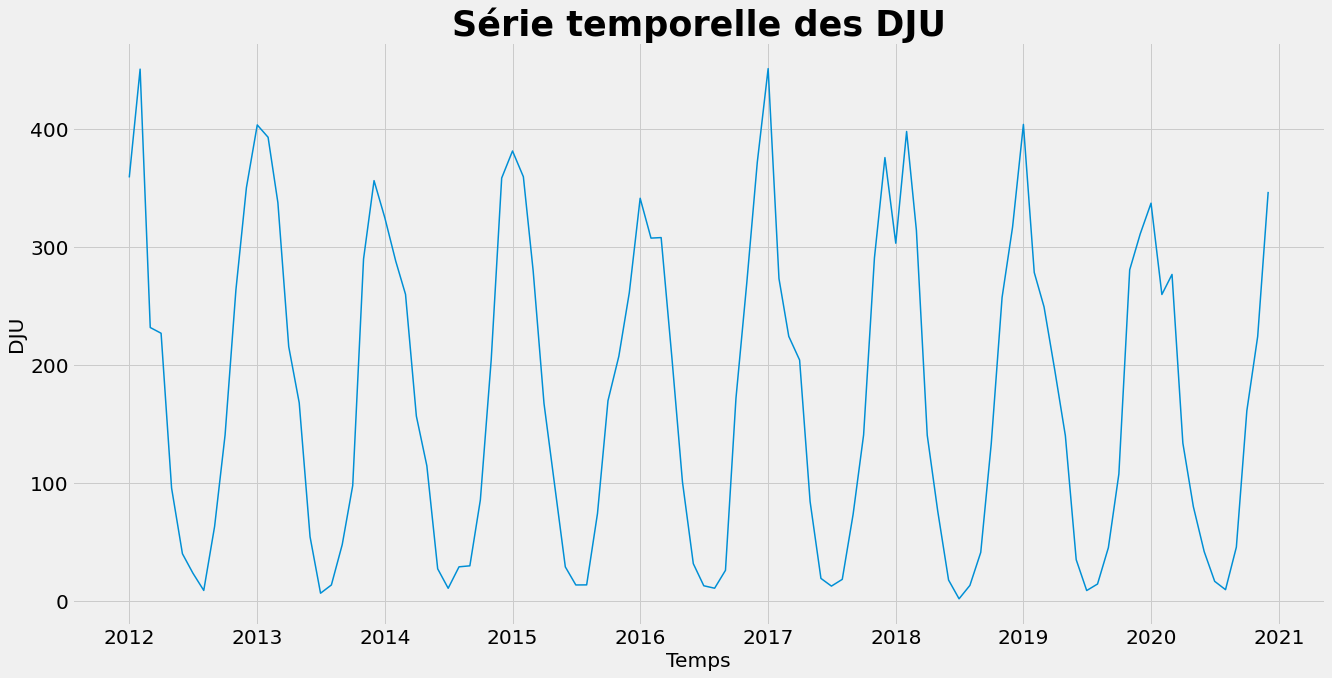

In [125]:
# Représentation graphiquement des températures en degré jour unifié

plt.plot(DJU.DJU_mean)
plt.xlabel('Temps')
plt.ylabel('DJU')
plt.title('Série temporelle des DJU')
plt.show()

Cette série temporelle prend naturellement en compte la saisonnalité liée aux conditions climatiques. Nos cycles mensuels évoluent donc en fonction de la température, et d'autres facteurs exogènes non pris en compte dans l'étude comme l’humidité, l'impact de la pollution, etc… Pour finir, les DJU sommés sur une période permettent de calculer les besoins de chauffage d’un bâtiment.



## 3) Analyses bivariées**

Avant de corriger la consommation d'énergie à l'aide de la température en degré jour unifié, **on crée un dataframe contenant uniquement les informations que l'on va utiliser pour la suite de notre étude.**

In [130]:
#Création d'un échantillon de travail par jointure des deux précédents dataframe
df_final = pd.merge(conso2,DJU, how='inner', on='date')

In [131]:
df.index = pd.to_datetime(df.index)

In [132]:
df.head()

consommation  DJU_mean
date                              
2012-01-01         51086  358.6375
2012-02-01         54476  450.3875
2012-03-01         43156  231.4875
2012-04-01         40176  226.6375
2012-05-01         35257   95.4625

In [133]:
#Vérification rapide des éventuelles valeurs manquantes dans l'échantillon
df.isna().any()

consommation    False
DJU_mean        False
dtype: bool

###3.1) Distribution de la consommation totale d'électricité

On représente graphiquement la distribution de la consommation d'électricité et on vérifie que cette distribution suit une loi normale. Pour cela, on va effectuer un test de Shapiro-Wilk avec les hypothèses :

H0 : stipulant la normalité des données est acceptée si p-value > 0.05

H1 : H0 est rejeté et la normalité ne peut être vérifiée

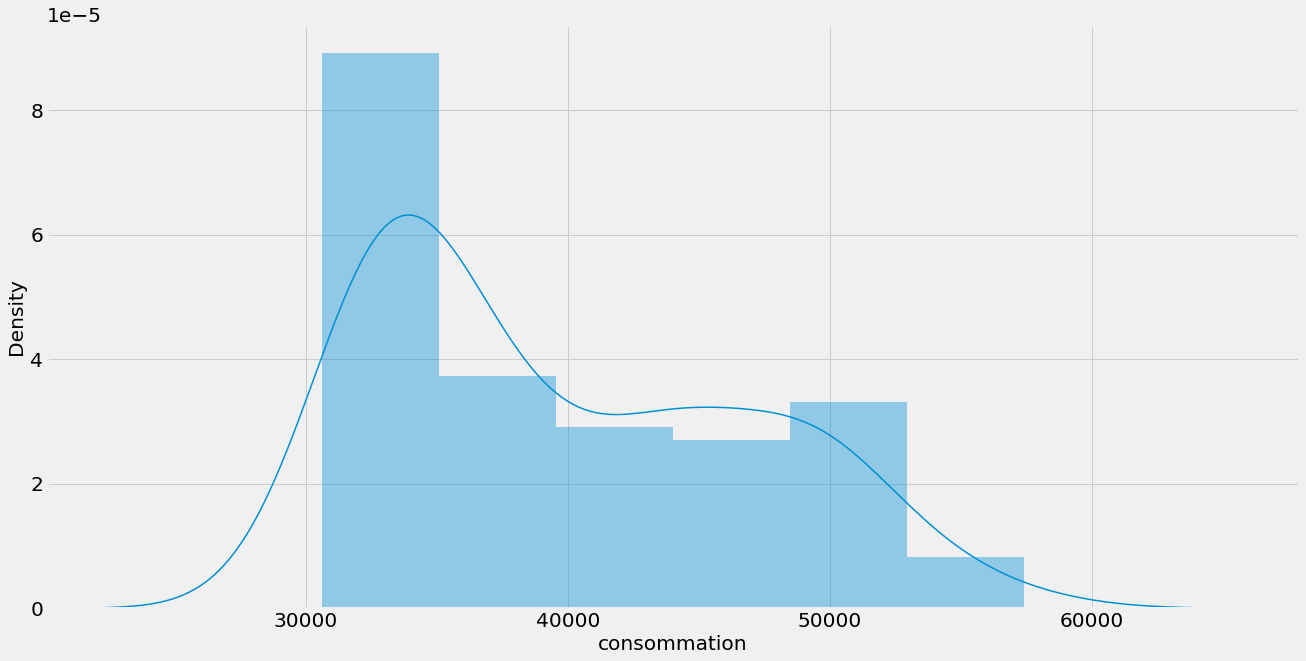

(0.9086519479751587, 1.7041213595803129e-06)

In [134]:
import scipy.stats as st
sns.distplot(df['consommation'])
plt.show()
st.shapiro(df['consommation'])

On obtient une p-value > 0.05, on peut donc confirmer l'hypothèse nulle H0 selon laquelle les données suivent une distributiion normale.



###3.2) Distribution des températures en DJU

La démarche pour la distribution des températures selon le DJU moyen est la même. On va faire une représentation graphique de notre distribution puis on va effectuer un test de Shapiro-Wilk pour vérifier si notre distribution suit une loi normale. On va donc avoir les deux hypothèses suivantes :

H0 : stipulant la normalité des données est acceptée si p-value > 0.05

H1 : Si P-value < 0.05 , H0 est rejeté et la normalité ne peut être vérifiée

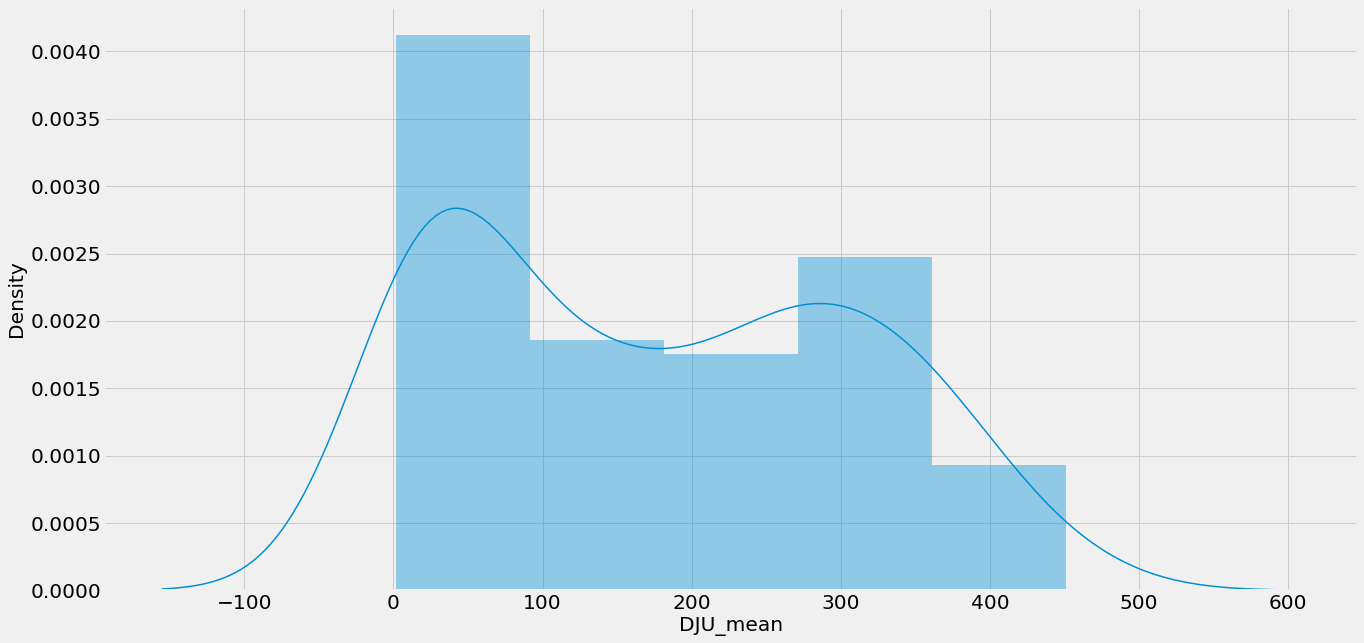

(0.9156898856163025, 3.98589736505528e-06)

In [135]:
sns.distplot(df['DJU_mean'])
plt.show()
st.shapiro(df['DJU_mean'])

Notre test indique une p-value > 0.05. On peut donc rejeter l'hypothèse H1 selon laquelle il est peu probable que notre distribution suive une loi normale.

La distribution des températures et de la consommation d'électricité suivent une loi normale.

L'échantillon de travail étant désormais constitué, la prochaine étape consistera à corriger ces données de la consommation en électricité de l'effet température causé par le chauffage. La régression linéaire sera utilisée.

### 3.3) Corrélation entre consommation et température**

Une fois que l'on a montré que nos deux variables suivent une loi normale. On effectue une corrélation entre ces deux variables. on obtiend un modèle de régression linéaire qui nous permettra de corriger la consommation d'électricité en fonction de la température enregistrée.

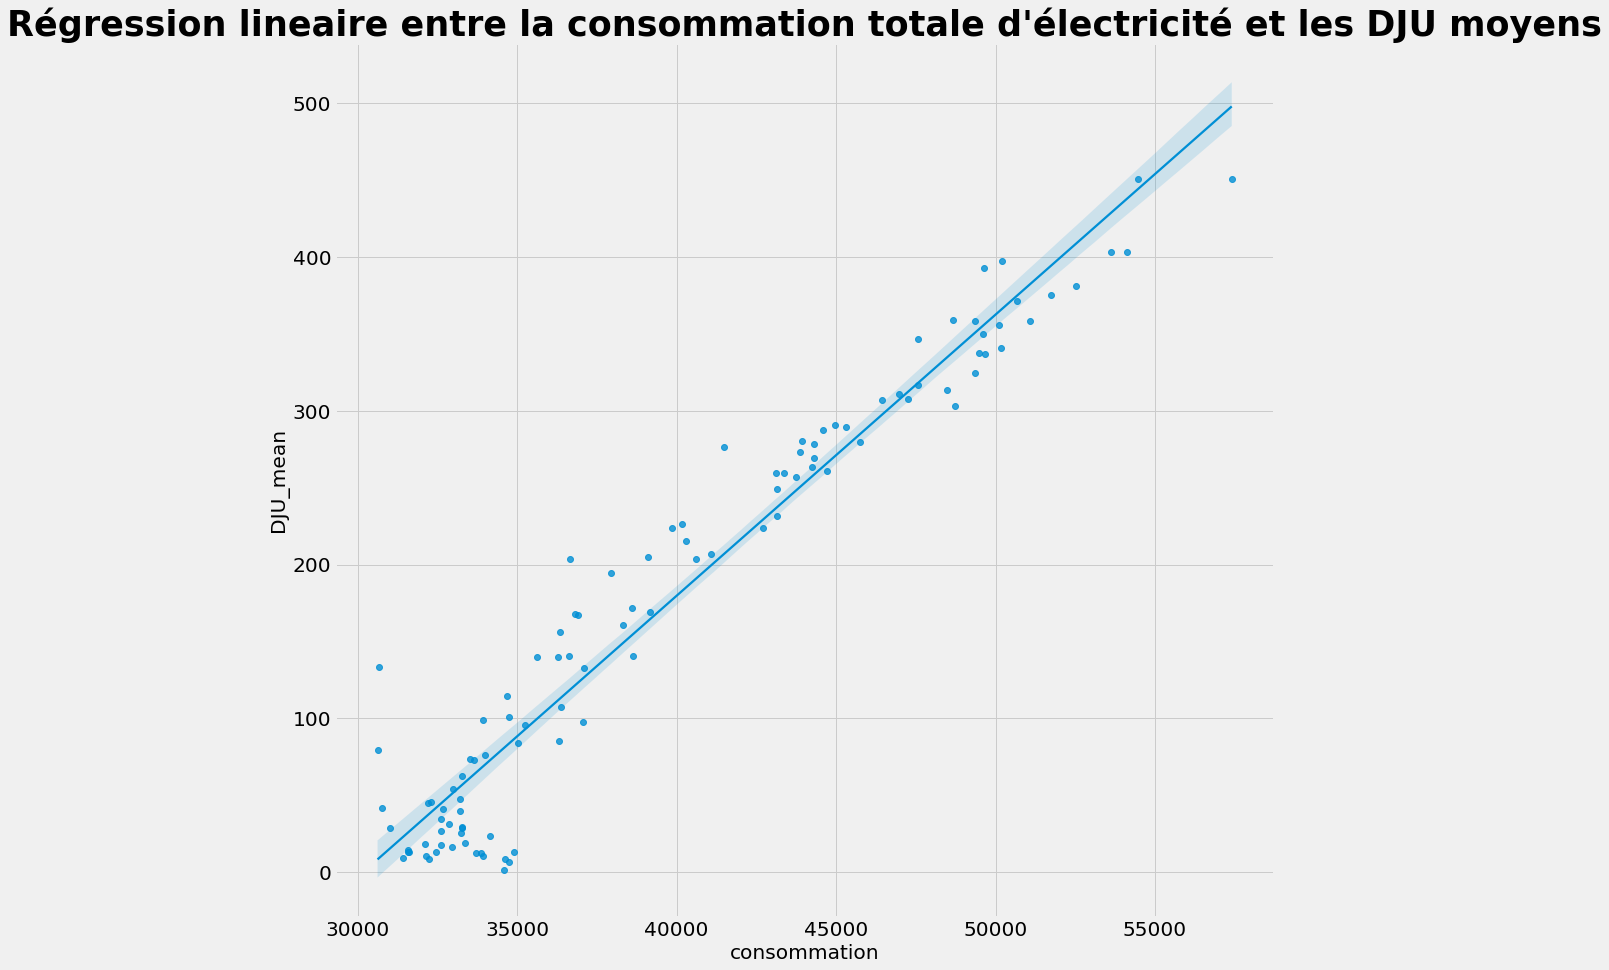

In [136]:
plt.figure(figsize=(15,15))
sns.regplot('consommation', 'DJU_mean', data=df)
plt.title('Régression lineaire entre la consommation totale d\'électricité et les DJU moyens')
plt.show()

In [137]:
X = np.array(df['consommation'])
y = np.array(df['DJU_mean'])

slope, intercept, r_value, p_value, std_err = st.linregress(X,y)
print('r-squared : ', r_value**2)
print('p-value : ', p_value)
print('slope :' , slope)

r-squared :  0.9372893572303544
p-value :  1.4492514669954614e-65
slope : 0.018275973342575233


Notre régression linéaire montre un coefficient de détermination de 0.89. On en conclut qu'il y a une forte corrélation entre la consommation totale et la température en DJU. 

De plus, l'observation de notre graphique montre que cette corrélation est positive (plus la consommation augmente plus la différence de température est élevé). De plus, la p-value est supérieure à 0.05 donc notre corrélation est statistiquement significative.

On effectue une nouvelle régression linéaire pour créer une variable qui contient le paramètre de la régression associée à la température. Cette variable sera ensuite utilisée pour corriger la consommation d'énergie.

In [138]:
x= sm.add_constant(df['DJU_mean'])
y = df['consommation']

reg = sm.OLS(y, x).fit()
params = reg.params['DJU_mean']

### 3.4) Correction des données de consommation en électricité**

On crée une nouvelle colonne dans notre dataframe qui contient les valeurs de la consommation totale corrigée grâce au paramètre de la régression linéaire que l'on a extrait plus tôt.

In [139]:
df['Consommation totale corrigée'] = df['consommation'] - (df['DJU_mean'] * params)
df['Consommation totale corrigée'] = df['Consommation totale corrigée'].apply(lambda x : int(x))
df.head()

consommation  DJU_mean  Consommation totale corrigée
date                                                            
2012-01-01         51086  358.6375                         32693
2012-02-01         54476  450.3875                         31377
2012-03-01         43156  231.4875                         31284
2012-04-01         40176  226.6375                         28552
2012-05-01         35257   95.4625                         30361

Une fois la correction de la consommation calculée, on la représente graphiquement pour voir la différence entre consommation totale et consommation totale corrigée de la température.

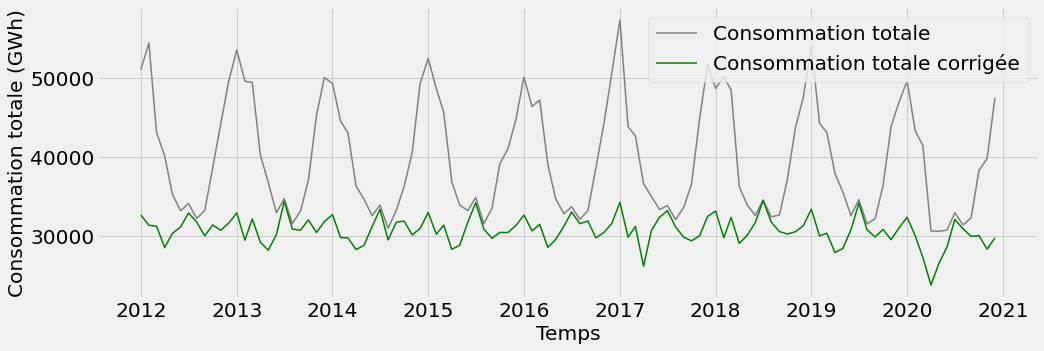

In [140]:
plt.figure(figsize=(15,5))
plt.plot(df['consommation'], label='Consommation totale', color='grey')
plt.plot(df['Consommation totale corrigée'], label='Consommation totale corrigée', color='green')
plt.xlabel('Temps')
plt.ylabel('Consommation totale (GWh)')
plt.legend(loc='best')
plt.show()

## 4) Décomposition de notre série temporelle/ Désaisonnalisation de la consommation obtenue après correction grâce aux moyennes mobiles**

Une fois la correction effectuée, on peut s'intéresser aux différents composants de la série temporelle.

**La méthode seasonal_decompose de statsmodels permet de visualiser la tendance, la saisonnalité et le résidu du signal.**

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

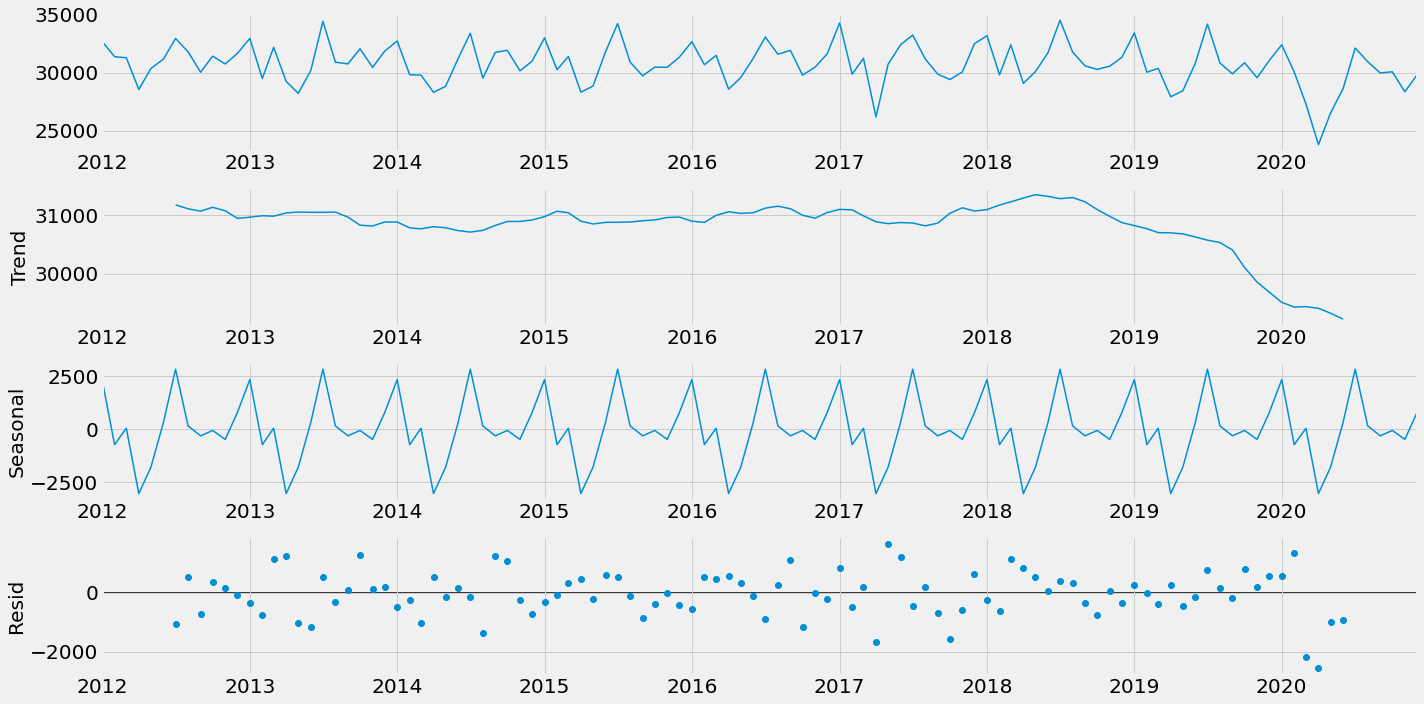

In [141]:
df_decomp = df[['Consommation totale corrigée']]
decomp_x = seasonal_decompose(df_decomp,  model='add')
decomp_x.plot()
plt.show()

On a ainsi décomposer notre série temporelle en saisonnalité, en tendance et obtenu les résidus.

On remarque que

la tendance globale est plutôt marquée par une baisse entre 2019 et 2020. *

La saisonnalité apparaît de manière assez récurrent dans nos données et représente la même continuité.

Pour mieux comprendre ce phénomène, on va créer une colonne qui va contenir la consommation désaisonnalisée à chaque mois.

In [142]:
df['Saisonnalité'] = decomp_x.seasonal
df['Consommation désaisonnalisée'] = df['Consommation totale corrigée'] - df['Saisonnalité']

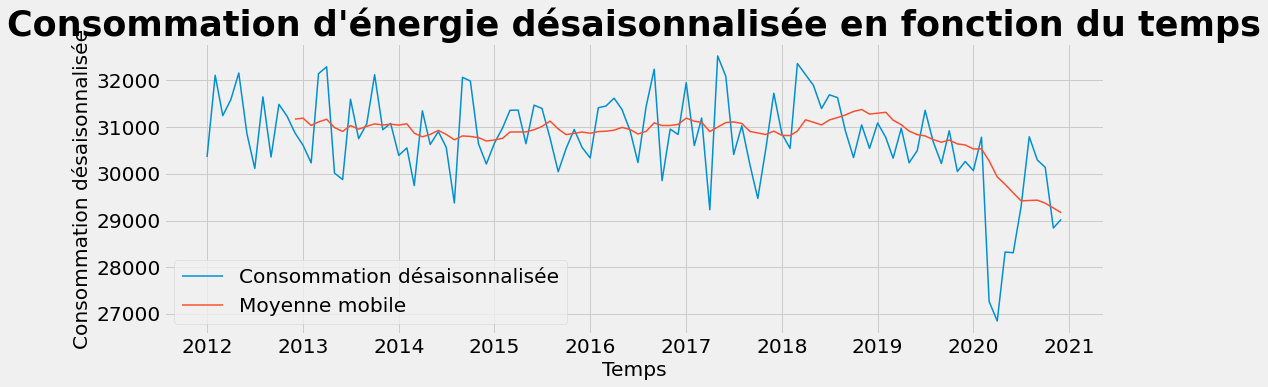

In [143]:
window_size = 12

windows = df['Consommation désaisonnalisée'].rolling(window_size)
moving_averages = windows.mean()

moving_averages_list = moving_averages.tolist()
without_nans = moving_averages_list[window_size - 1:]

plt.figure(figsize=(15,5))
plt.plot(df['Consommation désaisonnalisée'], label='Consommation désaisonnalisée')
plt.plot(moving_averages, label='Moyenne mobile')
plt.xlabel('Temps')
plt.ylabel('Consommation désaisonnalisée')
plt.title('Consommation d\'énergie désaisonnalisée en fonction du temps')
plt.legend(loc='best')
plt.show()

On remarque que la moyenne mobile de la consommation désaisonnalisée suit la tendance issue de la décomposition de notre série temporelle. Une fois cela effectuée, on va pouvoir tester plusieurs manières de modéliser et donc de prédire la consommation en énergie sur les douze prochains mois.

# 5) Modélisations et prédictions**

**1) A l'aide de la méthode de Holt-Winters**

La méthode de Holt-Winters génère des valeurs lissées de façon exponentielle pour le niveau, la tendance et l'ajustement saisonnier de la série temporelle.

Cette méthode convient pour les séries temporelles dont la saisonnalité et la tendance restent stables dans le temps.

**a) Définition du modèle**

On commence par définir les paramètres de notre modèle puis on le représente graphiquement.

Ces paramètres contiennent des informations sur la saisonnalité qui est égale à 12,une tendance et une saisonnalité additive.


In [35]:
from statsmodels.tsa.api import ExponentialSmoothing

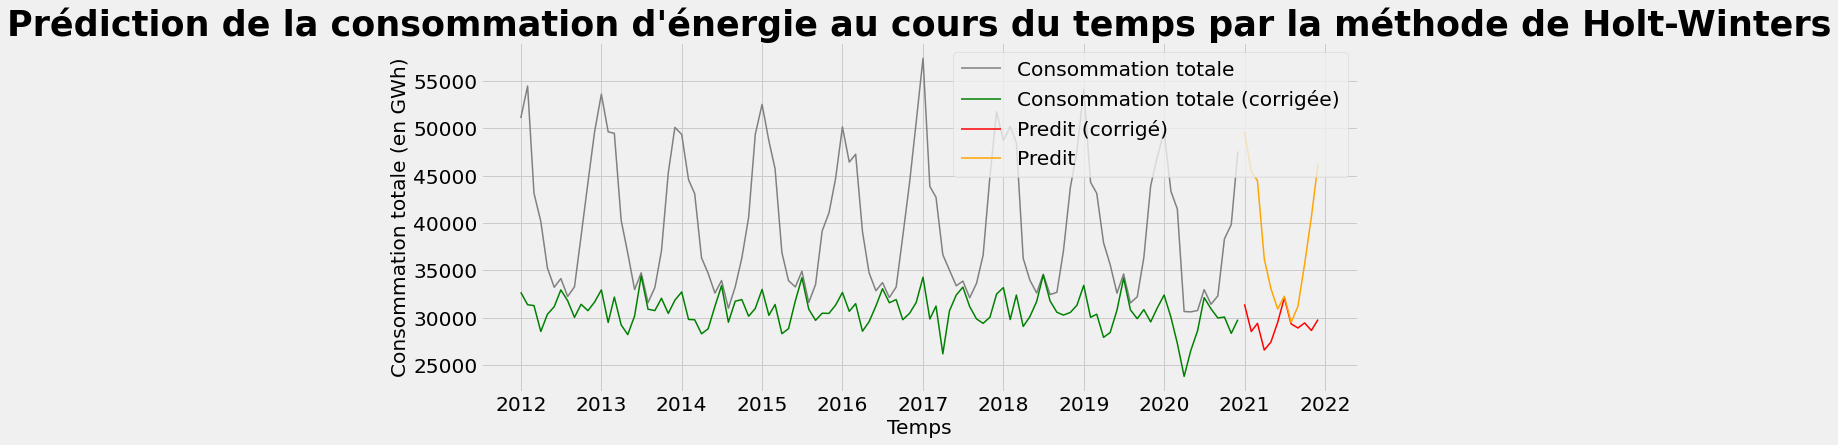

In [144]:
warnings.filterwarnings('ignore')
hw = ExponentialSmoothing(np.asarray(df['Consommation totale corrigée']), seasonal_periods=12, trend='add', seasonal='add').fit()
hw2 = ExponentialSmoothing(np.asarray(df['consommation']), seasonal_periods=12, trend='add', seasonal='add').fit()
hw_pred = hw.forecast(12)
hw_pred2 = hw2.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(df['consommation'], label='Consommation totale', color='grey')
plt.plot(df['Consommation totale corrigée'], label='Consommation totale (corrigée)', color='green')
plt.plot(pd.date_range(df.index[len(df)-1], periods=12, freq='M'),hw_pred, label='Predit (corrigé)', color='red')
plt.plot(pd.date_range(df.index[len(df)-1], periods=12, freq='M'),hw_pred2, label='Predit', color='orange')
plt.ylabel('Consommation totale (en GWh)')
plt.xlabel('Temps')
plt.title('Prédiction de la consommation d\'énergie au cours du temps par la méthode de Holt-Winters')
plt.legend(loc='best')
plt.show()

Pour mieux comprendre les résultats obtenus avec notre modèle, on effectue une représentation graphique avec uniquement les données de consommation corrigée.

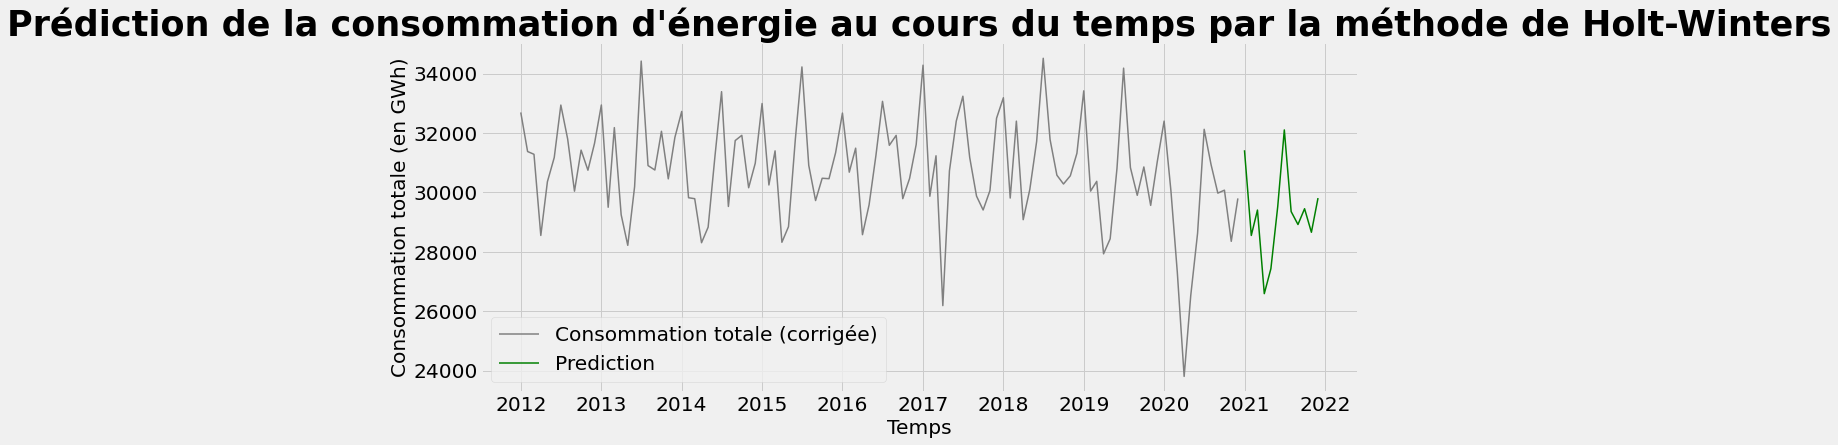

In [145]:
plt.figure(figsize=(14,6))
plt.plot(df['Consommation totale corrigée'], label='Consommation totale (corrigée)', color='gray')
plt.plot(pd.date_range(df.index[len(df)-1], periods=12, freq='M'),hw_pred, label='Prediction', color='green')
plt.ylabel('Consommation totale (en GWh)')
plt.xlabel('Temps')
plt.title('Prédiction de la consommation d\'énergie au cours du temps par la méthode de Holt-Winters')
plt.legend(loc='best')
plt.show()

**b) Evaluation du modèle**

Une fois les paramètres de notre modèle définis, on évalue notre modèle. Pour cela, on enlève les données des 12 derniers mois dont on dispose puis on compare les valeurs enregistrées avec les valeurs prédites de nottre modèle.

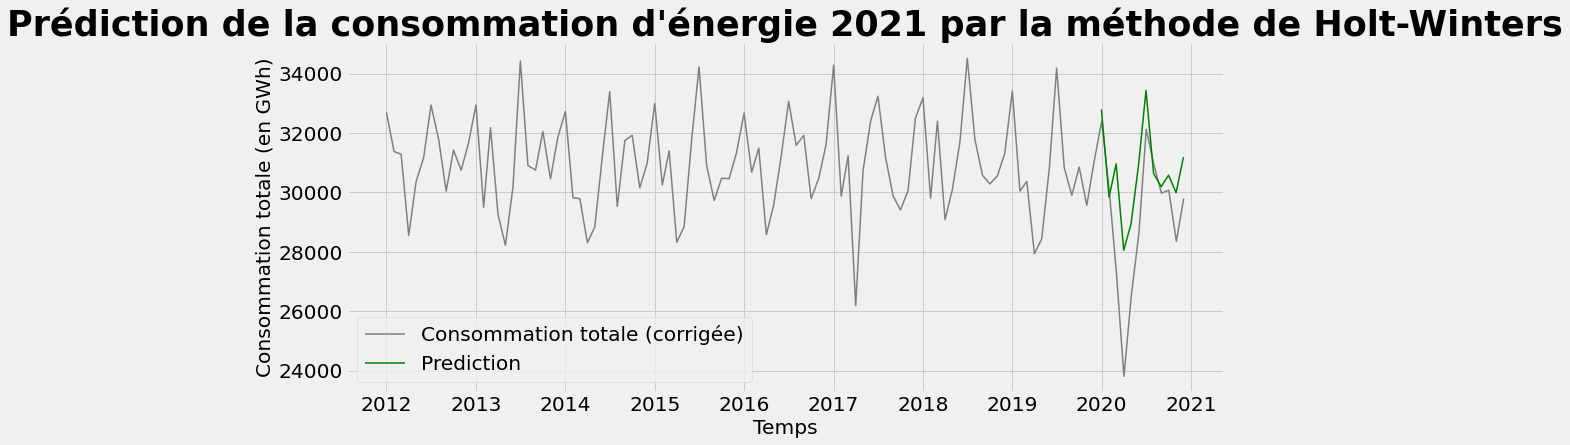

In [146]:
df_2 = df.drop(df.index[-12:])
warnings.filterwarnings('ignore')

hw = ExponentialSmoothing(np.asarray(df_2['Consommation totale corrigée']), seasonal_periods=12, trend='add', seasonal='add').fit()
hw_pred = hw.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(df['Consommation totale corrigée'], label='Consommation totale (corrigée)', color='gray')
plt.plot(pd.date_range(df_2.index[len(df_2)-1], periods=12, freq='M'), hw_pred, label='Prediction', color='green')
plt.ylabel('Consommation totale (en GWh)')
plt.xlabel('Temps')
plt.title('Prédiction de la consommation d\'énergie 2021 par la méthode de Holt-Winters')
plt.legend(loc='best')
plt.show()

Graphiquement, on remarque que la prédiction a réussi à capturer la saisonnalité et a prédit la baisse importante en 2021. Comme vu dans la définition de la méthode de Holt-Winters, ce modèle est bon pour prédire des événements lorsque la saisonnalité et la tendance sont stables. Or, selon la décomposition de notre série temporelle on remarque que la tendance est stable jusque 2019 mais qu'ensuite, elle s'effondre au début de l'année 2020

Pour conclure à l'évaluation de notre modèle, on va ensuite calculer un indice

- A présent, regardons la métrique MAPE du modèle :

- MAPE (Mean Average Percentage Error) L’erreur absolue moyenne en pourcentage, en d'autres termes la moyenne des écarts en valeur absolue par rapport aux valeurs observées. ou precision en termes de diff entre valeur reelle et valeurs estimees. pLus la mape est faible plus le modèle est capable de prédire des valeurs


In [147]:
y_pred = hw_pred
y_true = np.asarray(df_2['Consommation totale corrigée'].iloc[-12:])

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [148]:
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('MAPE = ', mape)

MAPE =  1.1490196851133527


Notre modèle obtient un score plutôt bon avec une marge d'erreur (MAPE) de 1%. Cependant ce type de modélisation n'est pas adapté pour notre série temporelle où la tendance est à la baisse au début de l'année 2020.



**2) A l'aide d'un modèle SARIMA**

Les modèles SARIMA (Seasonnal AutoRegressive Integrated Moving Average) permettent de modéliser des séries qui présentent une saisonnalité, comme c'est le cas pour notre dataset.

Pour contrer le problème de la difficulté de traitement de la présence d'une tendance et/ou d'une saisonnalité changeante, on utilisera un modèle issu de la méthode SARIMA. 

Cette méthode combine une méthode auto-regressive (modele qui utilise la relation de dépendance entre une observation et un certain nombre d'observations décalées), une méthode intégrée ( l'utilisation de la differenciation des observations brutes par exemple soustraire une observation de l'observation au pas de temps précedent afin de rendre la série temporelle stationnaire) à une méthode de moyenne mobile ( moyenne qui utilise la dépendance entre une observation et une erreur résiduelle à partir d'un modèle de moyenne appliqué à des observations décalées.

*Cependant, on va devoir vérifier la non-stationnarité *de notre série temporelle avant de pouvoir la réaliser. On commence donc par créer une variable qui ne contient que notre série temporelle de la consommation corrigée.

In [149]:
y = df['Consommation totale corrigée']

**a) Analyses préalables**

Après avoir crée une variable ne contenant que notre série temporelle, on va ensuite s'intéresser à la saisonnalité et au calcul de la stationnarité de notre série temporelle.

Nous allons tester la stationnarité de notre série avec le test ADF (Augmented Dickey-Fuller). L'hypothèse nulle du test est que la série temporelle n'est pas stationnaire.

Une série stationnaire est celle qui ne présente pas de tendance ou de saisonnalité.Il est essentiel de supprimer toute tendance ou saisonnalité avant de modéliser les données de la série chronologique, car si les propriétés statistiques ne changent pas au fil du temps, il est plus facile de modéliser les données avec précision. L'une des façons populaires de rendre la série stationnaire est la différenciation.



**Concrètement, plusieurs étapes sont nécessaires **


- Identifier/confirmer la saisonnalité s (autocorrélogrammes)

- Stationnariser la série temporelle (différenciation)

- Estimer les paramètres

- Valider ou non le modèle par un diagnostique des résidus (test, représentation graphique, autocorrélogramme)

- Confirmer le(s) choix en simulant la prévision.



In [182]:
#Fonction affichant le Test de Dickey–Fuller avec les autocorrélogrammes ACF et PACF
def tsplot(y, lags=None, figsize=(20, 10), style='bmh'):
    """
    Test de Dickey–Fuller
    avec Autocorrélogrammes ACF et PACF

    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        sm.tsa.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        sm.tsa.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

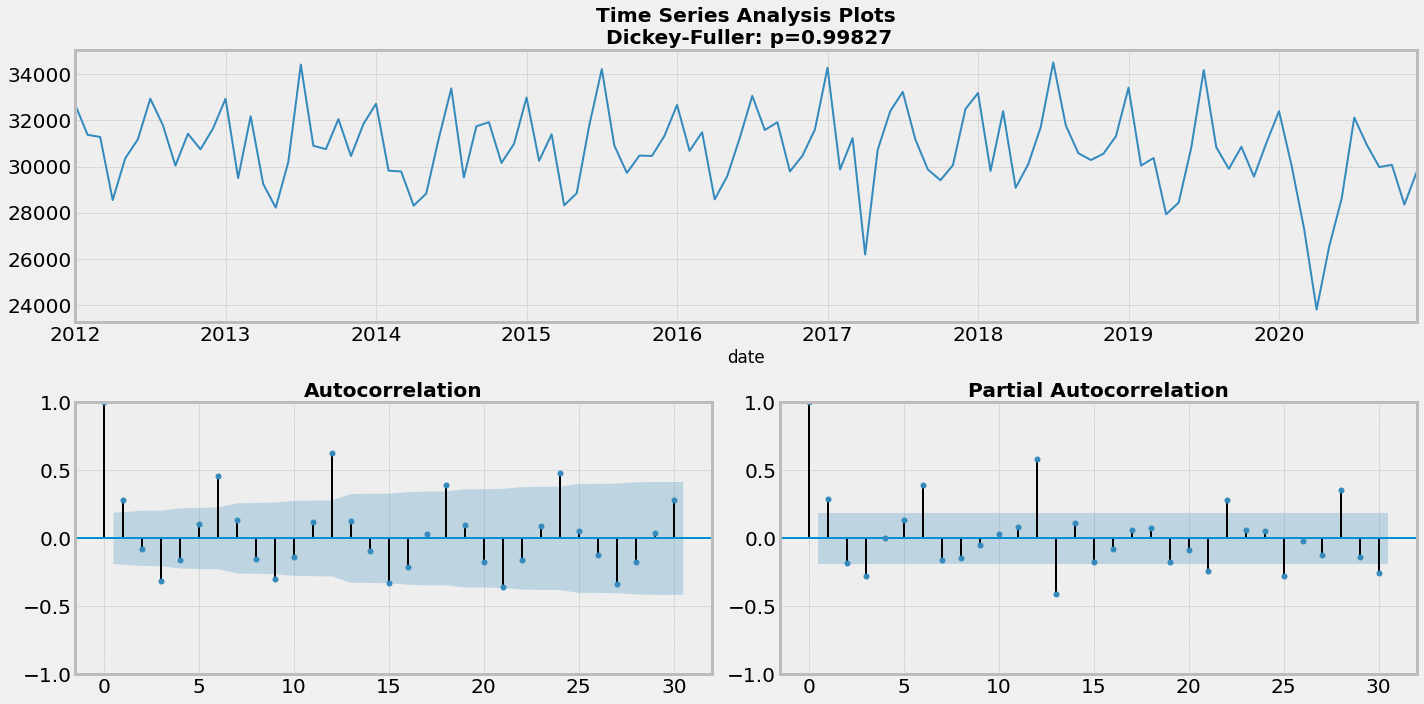

In [151]:
tsplot(y, lags=30)

La sortie ACF présente une décroissance lente vers 0, ce qui traduit un problème de non-stationnarité. Confirmation également par le test de Dickey-Fuller portant pour hypothèse nulle la non-stationnarité de la série, ne pouvant pas être rejetée. 

Nous sommes en présence d'une série temporelle marquée par une forte saisonnalité, très classique sur les températures climatiques. Il n'est pas possible de modéliser directement par un processus stationnaire, la stationnarisation du processus sera donc mise en oeuvre. La méthode retenue sera la différenciation

On observe également une différenciation égale à 12. On va donc faire une différenciation I - B avec B = 12.

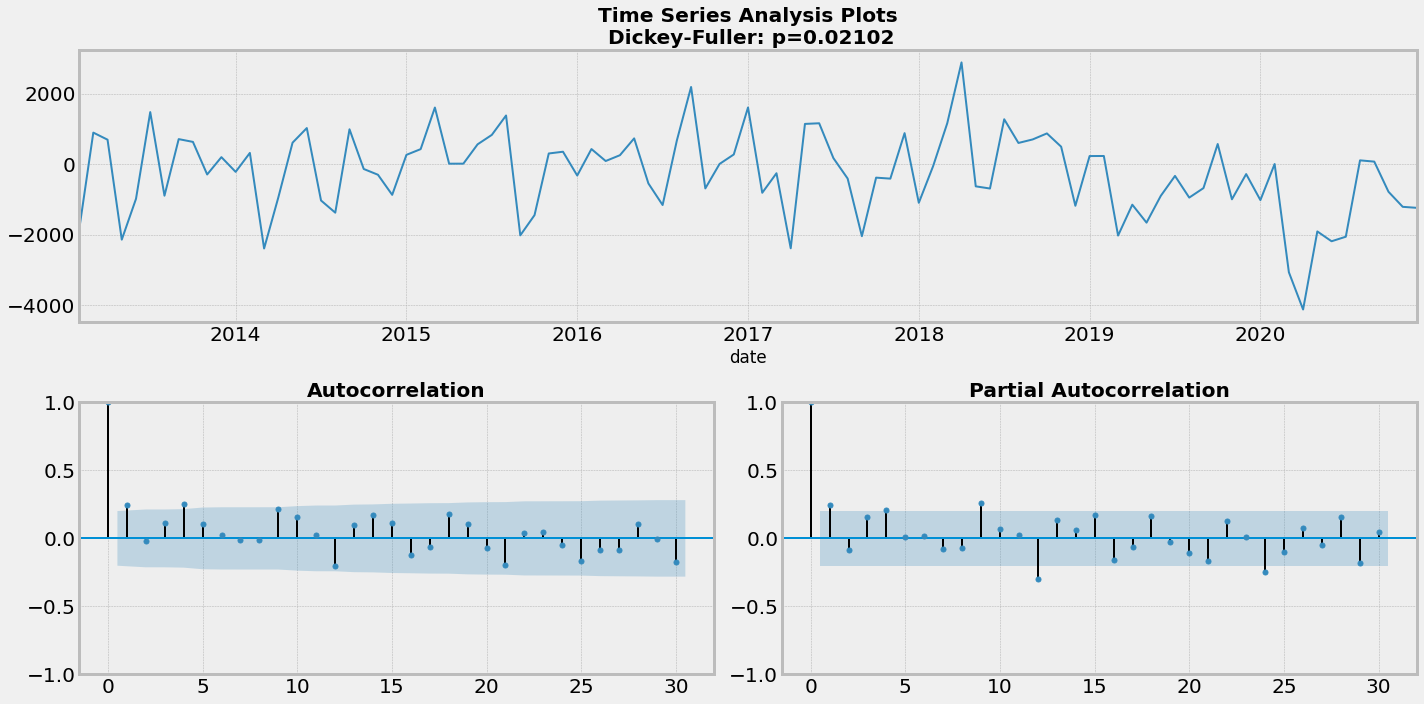

In [152]:
y2 = y - y.shift(12)
tsplot(y2[13:], lags=30)

Une fois la première différenciation réalisée, on remarque qu'il y'a un leger  pic dans le graphique ACF au décalage 1 ou qu'aucun retard significatifs ne sort de la zone définie par notre autocorrélogramme . On va donc déterminer les paramètres p, q, d, P, Q et D de notre modèle SARIMA en sachant que s = 12.

Pour ce faire, on regarde si notre série temporelle est stationnaire ou non. Pour cela, on réalise un test de Dickey-Fuller avec les hypothèses suivantes :

Hypothèse nulle (H0) : La consommation totale corrigée est issue d'une racine unitaire, elle est donc non stationnaire.

Hypothèse alternative (H1) : La consommation totale corrigée n'est pas issue d'une racine unitaire, elle est donc stationnaire.

On obtient une p-value supérieur à p < 0.05 au test de Dickey-Fuller on rejette donc l'hypothèse nulle: La consommation totale corrigée est issue d'une racine unitaire et est non stationnaire.

On détermine ensuite manuellement les meilleures paramètres de notre modèle SARIMA 

En effet, afin d'obtenir la meilleure prediction il est important de trouver les valeurs sarima (p,d,q)(P,d,Q)m qui optimisnent une métrique d'interet

On se sert donc de l'analyse de nos graphique ACF et PCAF obtenue après différenciation

les meilleurs paramètres sont donc les suivants 
order=(1,1,1), seasonal_order = (1, 1, 1, 12)

In [167]:
model = SARIMAX(y, order=(1,1,1), seasonal_order = (1, 1, 1, 12))
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:       Consommation totale corrigée   No. Observations:                  108
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -818.988
Date:                            Mon, 28 Mar 2022   AIC                           1647.977
Time:                                    16:37:33   BIC                           1660.746
Sample:                                01-01-2012   HQIC                          1653.136
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5268      0.226      2.328      0.020       0.083       0.970
ma.L1         -0.6342      0.221   

Normalité des résidus :
Dans le cadre de prévisions, il convient de vérifier la normalité des résidus pour tester l'adéquation de nos modèles. La normalité peut-être détectée de façon graphique, mais des tests statistiques amènent un point de vue objectif non négligeable

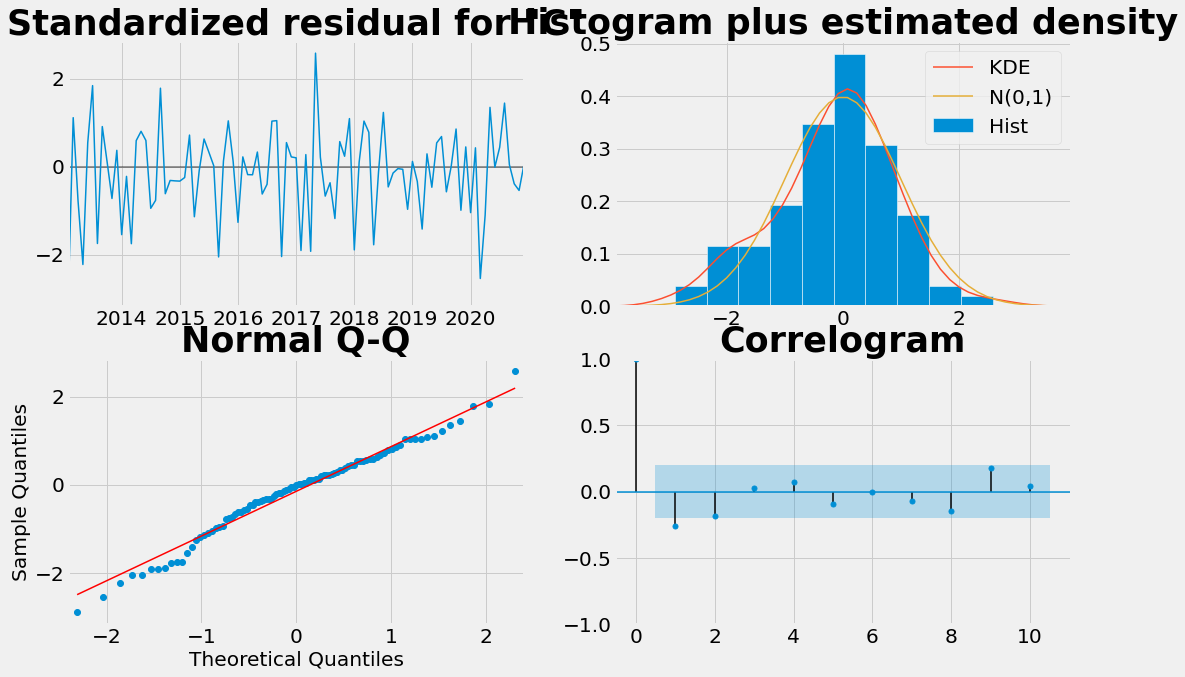

In [168]:
results.plot_diagnostics(figsize=(16,10));

- En haut à gauche : les erreurs résiduelles semblent fluctuer autour d'une moyenne de zéro et avoir une variance uniforme

- En haut à droite : le diagramme de densité suggère une distribution normale 

- En bas à gauche : La distribution ordonnée des résidus représentée par le du Q-Q plot est globalement satisfaisante, il y a quand même des petites divergences vers les queues de distribution. Il est intéressant de coupler l'approche visuelle par des tests statistiques

In [169]:
st.shapiro(results.resid)

(0.42698919773101807, 1.2170412784045031e-18)

La distribution de nos résidus semble suivre une loi normale. On vérifie cela avec un test de Shapiro-Wilk se basant sur les hypothèses suivantes :

H0 : Il est peu probable que la distribution de nos résidus suive une loi normale
H1 : Il est probable que la distribution de nos résidus suive une loi normale

La p-value est inférieure à 0.05. On peut donc rejeter l'hypothèse H0 selon laquelle il est peu probable que la distribution de nos résidus suive un loi norma

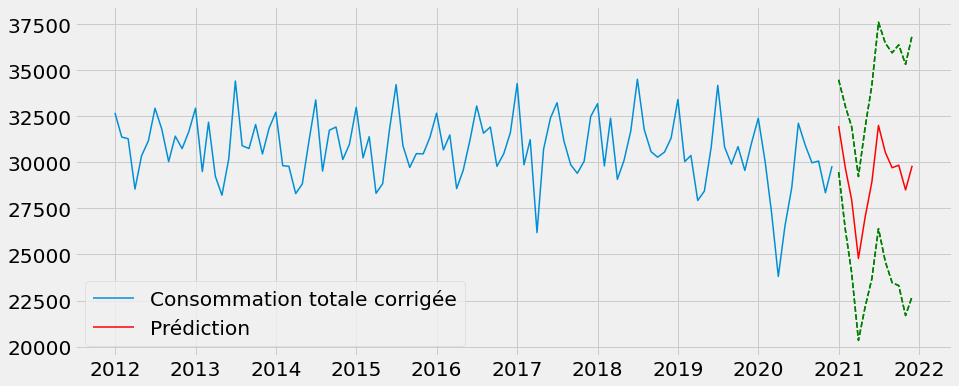

In [170]:
pred_model1 = results.get_forecast(12)
pred = pred_model1.predicted_mean
pred_l = pred_model1.conf_int(alpha=0.05)
pred_u = pred_model1.conf_int(alpha=0.05)

plt.figure(figsize=(14,6))
plt.plot(y, label='Consommation totale corrigée')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred, color='r', label='Prédiction')
plt.plot(pd.date_range(y.index[len(df)-1], periods=12, freq='M'), pred_l, color='g', linestyle='--')
plt.plot(pd.date_range(y.index[len(df)-1], periods=12, freq='M'), pred_u, color='g', linestyle='--')
plt.legend()
plt.show()

Une fois la prédiction réalisée sur les 12 prochains mois, on va tester notre modèle. Pour cela, on lui demande de faire une prédiction sur des données déjà connues

In [171]:
y_true = y[-12:]
y = y.shift(-12).dropna()

In [172]:
model = SARIMAX(y, order=(1,1,1), seasonal_order = (1, 1, 1, 12))
results2 = model.fit()

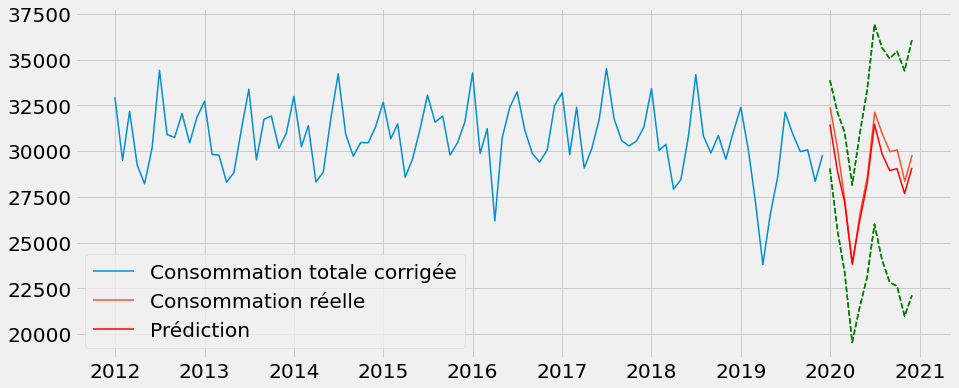

In [173]:
pred_model2 = results2.get_forecast(12)
pred2 = pred_model2.predicted_mean
pred_l2 = pred_model2.conf_int(alpha=0.05)
pred_u2 = pred_model2.conf_int(alpha=0.05)

plt.figure(figsize=(14,6))
plt.plot(y, label='Consommation totale corrigée')
plt.plot(y_true, label = 'Consommation réelle')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred2, color='r', label='Prédiction')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred_l2, color='g', linestyle='--')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred_u2, color='g', linestyle='--')
plt.legend()
plt.show()

On observe que notre prédiction est légèrement plus faible que la consommation réelle. La consommation réelle se situe entre notre prédiction et la borne supérieure de notre intervalle de confiance. Il a réussi à prendre en compte la baisse importante du début 2020

Pour appuyer cette analyse de la performance, on calcule la MAPE

In [174]:
y_pred = pred2

In [176]:
mape = np.mean(np.abs((y_true - y_pred) / y_pred)) * 100
print('MAPE = ', mape)

MAPE =  2.3284519381350766


Les scores de la méthode SARIMA est légèrement moins bon que celui de la méthode de Holt-Winters. On obtient une marge d'erreur sur les valeurs propres de presque 2% (MAPE) contre 1% pour la méthode de Holt-Winters.

Cependant, il ne faut pas oublier que notre série temporelle contient une tendance qui n'est plus stable à partir de 2020. La méthode de Holt-Winters aurait été plus performante si la tendance restait stable mais dans le cas contraire, la méthode SARIMA permet de mieux prédire les valeurs influencées par la non-stabilité de la tendance.

Par ailleurs, le modèle SARIMA sera retenu prioritairement pour prédire la consommation d’électricité plus ponctuelle (à court terme), il sera plus performant et plus robuste dans des prévisions devant prendre en compte de forts impacts saisonniers.